# Hierarchical Clustering Project

##### ● Data Preprocessing. Remove all cereals with missing values. 

##### ● Task 1: Apply hierarchical clustering to the data using Euclidean distance to the normalized measurements. Use Agnes to compare the clustering from  single linkage, completelinkage, average linkage, and Ward. Choose the best method.
##### ● Task 2:  How many clusters would you choose?
##### ● Task 3:  The elementary public schools would like to choose a set of cereals to include in their daily cafeterias. Every day a different cereal is offered, but all cereals should support a healthy diet. For this goal, you are requested to find a cluster of “healthy cereals.” 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_files/Cereals.csv')

### Data Analysis

In [ ]:
df.info()   #i can see here that the carbo, sugars and potassium columns have missing variables. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


##### Removing the NaN values:

In [ ]:
df.dropna(axis = 0, inplace=True)

In [ ]:
df.head()   #seeing that the almond_delight entry was removed. 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


In [ ]:
df.info() #verifying there are no NaN values here

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


### Data Exploration

##### I want to try and visualize some groupings:

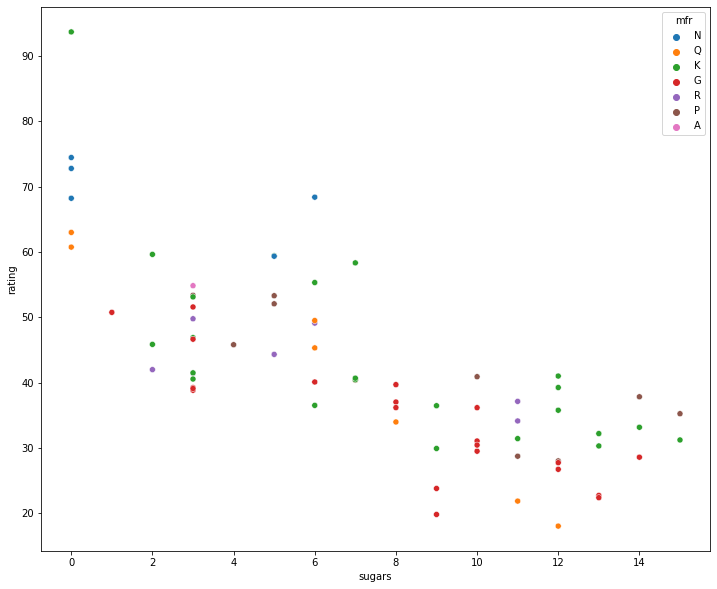

In [ ]:
plt.figure (figsize = (12, 10))
sns.scatterplot(x = 'sugars', y = 'rating', hue = 'mfr', data = df)

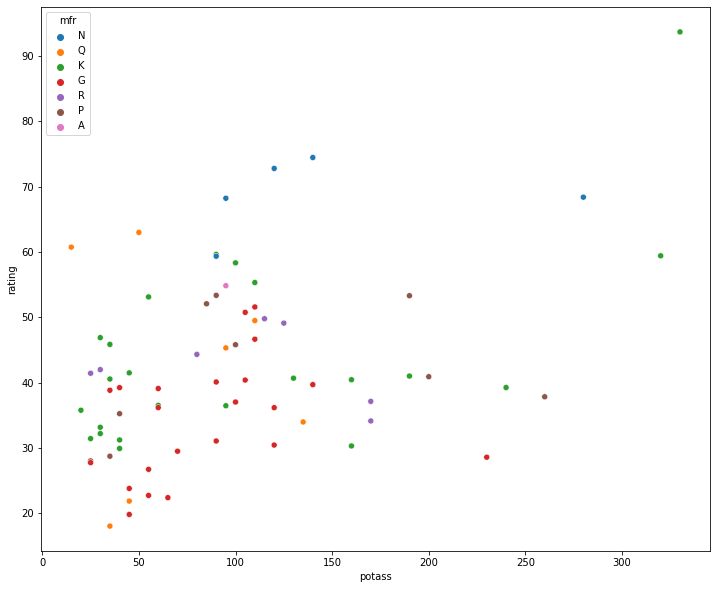

In [ ]:
plt.figure (figsize = (12, 10))
sns.scatterplot(x = 'potass', y = 'rating', hue = 'mfr', data = df)

### Data Preparation

In [ ]:
X_numerical = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']]  #data to be normalized
X_categorical = df[['mfr', 'type']]    
X_names = df[['name']]                                                                                                      #need to apply OneHotEncoder

In [ ]:
from sklearn.preprocessing import normalize
X_scaled = normalize(X_numerical)
X_scaled = pd.DataFrame(X_scaled, columns=X_numerical.columns)
X_scaled.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0.215316,0.012304,0.003076,0.399873,0.030759,0.015380,0.018456,0.861265,0.076899,0.009228,0.003076,0.001015,0.210404
1,0.649058,0.016226,0.027044,0.081132,0.010818,0.043271,0.043271,0.730190,0.000000,0.016226,0.005409,0.005409,0.183811
2,0.165342,0.009448,0.002362,0.614126,0.021258,0.016534,0.011810,0.755848,0.059051,0.007086,0.002362,0.000779,0.140364
3,0.133302,0.010664,0.000000,0.373245,0.037324,0.021328,0.000000,0.879791,0.066651,0.007998,0.002666,0.001333,0.249820
4,0.486522,0.008846,0.008846,0.796126,0.006634,0.046441,0.044229,0.309605,0.110573,0.004423,0.004423,0.003317,0.130518


In [ ]:
#Encoding the categorical Columns
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_categorical_encoded = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical_encoded = pd.DataFrame(X_categorical_encoded)
X_categorical_encoded = X_categorical_encoded.rename(columns = {0 : 'A', 1: 'G', 2: 'K', 3 : 'N', 4: 'P', 5: 'Q', 6 : 'R', 7 : 'C', 8 : 'H'})

In [ ]:
#combining the dataframe back together

X_all = pd.concat([X_scaled, X_categorical_encoded], axis = 1)
X_all.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,rating,A,G,K,N,P,Q,R,C,H
0,0.215316,0.012304,0.003076,0.399873,0.030759,0.015380,0.018456,0.861265,0.076899,0.009228,...,0.210404,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.649058,0.016226,0.027044,0.081132,0.010818,0.043271,0.043271,0.730190,0.000000,0.016226,...,0.183811,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.165342,0.009448,0.002362,0.614126,0.021258,0.016534,0.011810,0.755848,0.059051,0.007086,...,0.140364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.133302,0.010664,0.000000,0.373245,0.037324,0.021328,0.000000,0.879791,0.066651,0.007998,...,0.249820,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.486522,0.008846,0.008846,0.796126,0.006634,0.046441,0.044229,0.309605,0.110573,0.004423,...,0.130518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Model Development

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

##### Task 1:

In [ ]:
cluster_ward = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
cl_ward = cluster_ward.fit_predict(X_all)
ward_score = silhouette_score(X_all, cl_ward)

cluster_single = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
cl_single = cluster_single.fit_predict(X_all)
single_score = silhouette_score(X_all, cl_single)

cluster_complete = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
cl_complete = cluster_complete .fit_predict(X_all)
complete_score = silhouette_score(X_all, cl_complete)

cluster_average = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
cl_average = cluster_average.fit_predict(X_all)
average_score = silhouette_score(X_all, cl_average)

print('Ward Score is: '+ str(ward_score))
print('Single Score is: '+ str(single_score))
print('Complete Score is: '+ str(complete_score))
print('Average Score is: '+ str(average_score))

Ward Score is: 0.49014855830060117
Single Score is: 0.27487815769108914
Complete Score is: 0.2683474545241037
Average Score is: 0.27487815769108914


##### Task 1 Answer: We can see that Ward is the best score. 

##### Task 2:

Text(0, 0.5, 'Euclidean Distances')

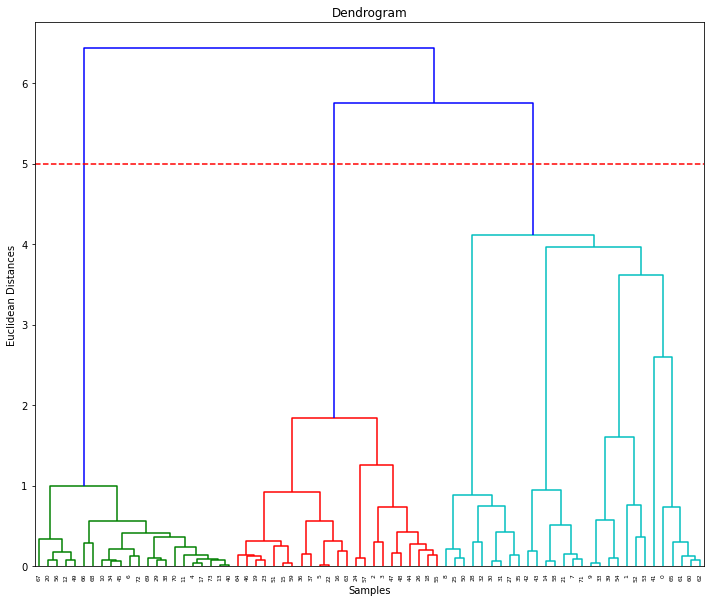

In [ ]:
plt.figure(figsize = (12, 10))
dendrogram = sch.dendrogram(sch.linkage(X_all, method = 'ward'))
plt.axhline(y=5, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')

##### Task 2: Looking at this dendrogram I would choose 3 main clusters

##### Task 3:

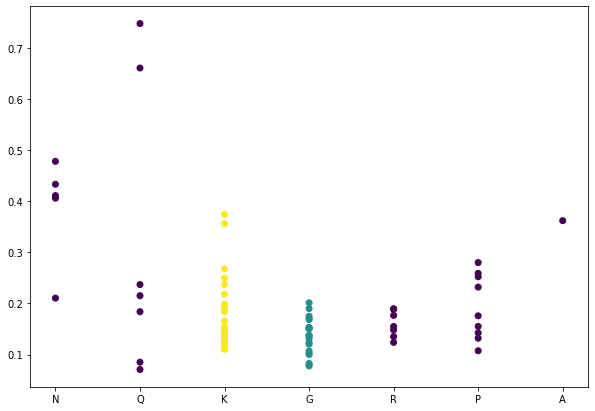

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_categorical['mfr'], X_all['rating'], c=cluster_ward.labels_) 

##### mfr = Manufacturer of cereal.
##### N = Nabisco.
##### Q = Quaker Oats.
##### K = Kelloggs.
##### G = General Mills.
##### R = Ralston Purina.
##### P = Post.
##### A = American Home Food Products.

##### We can see here in the above scatter plot that the Nabisco has a great grouping in the rating score. I would recommend the school stick with this brand for the "healthier cereals".